In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("INFY.csv")
df = df.iloc[::-1]  #reversing rows to get current date first
df = df.reset_index(drop=True)
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2021-07-01,INFY,EQ,1580.80,1576.85,1576.85,1559.05,1561.95,1560.40,1565.56,4814317,7.537112e+14,150925.0,2996603.0,0.6224
1,2021-06-30,INFY,EQ,1563.05,1572.05,1591.00,1572.05,1580.00,1580.80,1582.44,6058722,9.587563e+14,167938.0,3226132.0,0.5325
2,2021-06-29,INFY,EQ,1571.80,1561.00,1573.65,1559.20,1562.00,1563.05,1564.66,5913567,9.252700e+14,197132.0,3844762.0,0.6502
3,2021-06-28,INFY,EQ,1574.20,1572.90,1580.15,1560.60,1569.10,1571.80,1570.82,5019178,7.884238e+14,136591.0,3354874.0,0.6684
4,2021-06-25,INFY,EQ,1559.20,1572.00,1578.00,1543.00,1574.00,1574.20,1565.12,9780240,1.530725e+15,192643.0,5825533.0,0.5956


In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6348 non-null   object 
 1   Symbol              6348 non-null   object 
 2   Series              6348 non-null   object 
 3   Prev Close          6348 non-null   float64
 4   Open                6348 non-null   float64
 5   High                6348 non-null   float64
 6   Low                 6348 non-null   float64
 7   Last                5802 non-null   float64
 8   Close               6348 non-null   float64
 9   VWAP                6348 non-null   float64
 10  Volume              6348 non-null   int64  
 11  Turnover            6348 non-null   float64
 12  Trades              2501 non-null   float64
 13  Deliverable Volume  4843 non-null   float64
 14  %Deliverble         4843 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 744.0

In [6]:
df1 = df[['Date','Close']]
df1.shape

(6348, 2)

In [7]:
df1.head()

,Date,Close
0,2021-07-01,1560.40
1,2021-06-30,1580.80
2,2021-06-29,1563.05
3,2021-06-28,1571.80
4,2021-06-25,1574.20


In [8]:
pred_days = 15  #choises are only 5,10, 15
reward = 5
risk =-1 * (reward/4) #1:4 Trade
days_shape = 60
eps = 500



df1['Date_Xth'] = df1['Date'].shift(-1* pred_days)
df1['Xth'] = df1['Close'].shift(-1* pred_days)

df11 = df1.copy()
print(df11.head())

df11['Price_X+1th'] = df11['Close'].shift(-1*pred_days +1)
df11['Price_X+2th'] = df11['Close'].shift(-1*pred_days +2)
df11['Price_X+3th'] = df11['Close'].shift(-1*pred_days +3)
df11['Price_X+4th'] = df11['Close'].shift(-1*pred_days +4)
df11['Price_X+5th'] = df11['Close'].shift(-1*pred_days +5)

if pred_days > 5:
    df11['Price_X+6th'] = df11['Close'].shift(-1*pred_days +6)
    df11['Price_X+7th'] = df11['Close'].shift(-1*pred_days +7)
    df11['Price_X+8th'] = df11['Close'].shift(-1*pred_days +8)
    df11['Price_X+9th'] = df11['Close'].shift(-1*pred_days +9)
    df11['Price_X+10th'] = df11['Close'].shift(-1*pred_days +10)
    
if pred_days > 10:
    df11['Price_X+11th'] = df11['Close'].shift(-1*pred_days +11)
    df11['Price_X+12th'] = df11['Close'].shift(-1*pred_days +12)
    df11['Price_X+13th'] = df11['Close'].shift(-1*pred_days +13)
    df11['Price_X+14th'] = df11['Close'].shift(-1*pred_days +14)
    df11['Price_X+15th'] = df11['Close']#.shift(-15)
                                   
print(len(df1.Close))
print(df11.shape)

         Date    Close    Date_Xth      Xth
0  2021-07-01  1560.40  2021-06-10  1424.30
1  2021-06-30  1580.80  2021-06-09  1415.30
2  2021-06-29  1563.05  2021-06-08  1412.95
3  2021-06-28  1571.80  2021-06-07  1389.65
4  2021-06-25  1574.20  2021-06-04  1385.65
6348
(6348, 19)


C:\Users\abhij\AppData\Local\Temp\ipykernel_30672\2246226591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date_Xth'] = df1['Date'].shift(-1* pred_days)
C:\Users\abhij\AppData\Local\Temp\ipykernel_30672\2246226591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Xth'] = df1['Close'].shift(-1* pred_days)


In [9]:
print(risk)

-1.25


In [10]:
df1.head()

,Date,Close,Date_Xth,Xth
0,2021-07-01,1560.40,2021-06-10,1424.30
1,2021-06-30,1580.80,2021-06-09,1415.30
2,2021-06-29,1563.05,2021-06-08,1412.95
3,2021-06-28,1571.80,2021-06-07,1389.65
4,2021-06-25,1574.20,2021-06-04,1385.65


In [11]:
df11.head(15)

,Date,Close,Date_Xth,Xth,Price_X+1th,Price_X+2th,Price_X+3th,Price_X+4th,Price_X+5th,Price_X+6th,Price_X+7th,Price_X+8th,Price_X+9th,Price_X+10th,Price_X+11th,Price_X+12th,Price_X+13th,Price_X+14th,Price_X+15th
0,2021-07-01,1560.40,2021-06-10,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80,1560.40
1,2021-06-30,1580.80,2021-06-09,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80
2,2021-06-29,1563.05,2021-06-08,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05
3,2021-06-28,1571.80,2021-06-07,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80
4,2021-06-25,1574.20,2021-06-04,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20
5,2021-06-24,1559.20,2021-06-03,1389.65,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20
6,2021-06-23,1503.15,2021-06-02,1378.65,1389.65,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15
7,2021-06-22,1511.85,2021-06-01,1387.20,1378.65,1389.65,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85
8,2021-06-21,1500.30,2021-05-31,1393.75,1387.20,1378.65,1389.65,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30,1500.30
9,2021-06-18,1503.30,2021-05-28,1405.05,1393.75,1387.20,1378.65,1389.65,1385.65,1389.65,1412.95,1415.30,1424.30,1446.90,1461.80,1473.90,1480.60,1495.30,1503.30


to do 8888888888888888888
Note that when I label this Xth I should have correcponding date and not the T+pred_day date

update: this is done

In [12]:


c1 = []
for i in range(1,days_shape+1):
    df1['temp'] = df1['Xth'] - df1['Xth'].shift(-1*i)
    df1['temp'] = df1['temp']/df1['Xth']*100
    c1.append(df1['temp'].to_numpy())

print(len(c1))    
df2 = pd.DataFrame(c1)
df3 = df2.transpose()
print(len(df3[0]))

df3.head(10)


60


C:\Users\abhij\AppData\Local\Temp\ipykernel_30672\4132079558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp'] = df1['Xth'] - df1['Xth'].shift(-1*i)
C:\Users\abhij\AppData\Local\Temp\ipykernel_30672\4132079558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temp'] = df1['temp']/df1['Xth']*100


6348


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,4.953310,3.703574,3.756231,5.606263,6.122306,2.618830,2.829460,3.559643,3.471881,3.942287
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,3.091217,3.144210,5.006006,5.525330,1.999576,2.211545,2.946372,2.858051,3.331449,4.928284
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,2.983120,4.848013,5.368201,1.836583,2.048905,2.784953,2.696486,3.170671,4.770162,5.463746
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,3.252618,3.781528,0.190695,0.406577,1.154967,1.065016,1.547152,3.173461,3.878674,5.249523
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,3.503771,-0.097427,0.119078,0.869628,0.779418,1.262945,2.893949,3.601198,4.976004,3.990907
5,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,2.529414,3.623214,...,0.190695,0.406577,1.154967,1.065016,1.547152,3.173461,3.878674,5.249523,4.267262,3.317382
6,-0.620172,-1.095274,-1.914917,-1.711820,-1.349146,1.236717,2.219563,1.751714,2.854241,3.021071,...,-0.388061,0.366300,0.275632,0.761615,2.400899,3.111740,4.493526,3.503427,2.545969,5.378450
7,-0.472174,-1.286765,-1.084919,-0.724481,1.845444,2.822232,2.357266,3.452999,3.618800,3.402537,...,0.980392,0.890283,1.373270,3.002451,3.708910,5.082180,4.098183,3.146626,5.961649,8.664937
8,-0.810762,-0.609865,-0.251121,2.306726,3.278924,2.816143,3.906726,4.071749,3.856502,4.617040,...,1.356054,1.836771,3.458296,4.161435,5.528251,4.548879,3.601794,6.403587,9.094170,10.077130
9,0.199281,0.555140,3.092417,4.056795,3.597737,4.679549,4.843244,4.629728,5.384150,6.309384,...,2.626241,4.234725,4.932209,6.288032,5.316537,4.377068,7.156329,9.825273,10.800327,9.287926


In [13]:
df3.shape


(6348, 60)

In [14]:
c2 =df3.to_numpy()
c2

array([[0.63188935, 0.79688268, 2.43277399, ..., 3.55964333, 3.47188092,
        3.94228744],
       [0.16604254, 1.81233661, 2.0949622 , ..., 2.8580513 , 3.33144916,
        4.92828376],
       [1.64903217, 1.93212782, 1.64903217, ..., 3.17067129, 4.77016172,
        5.46374606],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [15]:
len(c2)


6348

In [16]:
c3 =[]

for i in range(int(len(c2)-days_shape)):
      
    c6 = np.concatenate((c2[i:i+days_shape]))
    
    c3.append(c6)
    
                

In [17]:
c3[1:3]

[array([ 0.16604254,  1.81233661,  2.0949622 , ..., 14.79735409,
        15.60866864, 14.8814092 ]),
 array([ 1.64903217,  1.93212782,  1.64903217, ..., 14.19122292,
        13.45174836, 13.55207908])]

In [18]:
len(c3)

6288

In [19]:
len(c3[0])

3600

In [20]:
df4 = pd.DataFrame(c3)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,9.059170,9.786522,10.095647,8.859148,11.226679,14.368840,13.459650,15.685347,15.212569,16.019929
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,9.344736,9.655374,8.412820,10.791945,13.949494,13.035851,15.272448,14.797354,15.608669,14.881409
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,8.137936,6.874512,9.293597,12.504180,11.575192,13.849355,13.366281,14.191223,13.451748,13.552079
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,6.191278,8.628112,11.862250,10.926446,13.217294,12.730676,13.561669,12.816770,12.917836,12.577204
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,7.306144,10.587074,9.637731,11.961722,11.468064,12.311081,11.555404,11.657933,11.312372,10.746563
5,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,2.529414,3.623214,...,11.504491,10.564889,12.865036,12.376442,13.210809,12.462886,12.564363,12.222348,11.662344,13.304769
6,-0.620172,-1.095274,-1.914917,-1.711820,-1.349146,1.236717,2.219563,1.751714,2.854241,3.021071,...,11.443564,13.721112,13.237319,14.063489,13.322913,13.423393,13.084738,12.530237,14.156526,14.889658
7,-0.472174,-1.286765,-1.084919,-0.724481,1.845444,2.822232,2.357266,3.452999,3.618800,3.402537,...,11.138367,10.640092,11.490993,10.728248,10.831736,10.482944,9.911844,11.586815,12.341893,13.020314
8,-0.810762,-0.609865,-0.251121,2.306726,3.278924,2.816143,3.906726,4.071749,3.856502,4.617040,...,7.995264,8.871350,8.086030,8.192581,7.833465,7.245462,8.970008,9.747435,10.445935,11.093133
9,0.199281,0.555140,3.092417,4.056795,3.597737,4.679549,4.843244,4.629728,5.384150,6.309384,...,7.875209,7.081305,7.189021,6.825979,6.231549,7.974946,8.760871,9.467007,10.121280,8.968324


In [21]:
df4.describe()

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
count,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,6288.000000,...,6223.000000,6222.000000,6221.000000,6220.000000,6219.000000,6218.000000,6217.000000,6216.000000,6215.000000,6214.000000
mean,-0.071226,-0.145399,-0.218138,-0.285762,-0.354349,-0.420235,-0.483184,-0.546482,-0.606661,-0.667541,...,-2.663425,-2.711439,-2.760493,-2.809555,-2.858397,-2.909519,-2.961841,-3.014186,-3.065655,-3.116481
std,5.529656,7.833385,9.592232,10.974928,12.233712,13.351308,14.341027,15.276267,16.099011,16.872291,...,33.194390,33.471990,33.751554,34.026659,34.289037,34.562833,34.820251,35.084829,35.337446,35.592221
min,-292.113856,-296.557354,-297.352357,-293.290477,-296.718015,-308.511740,-313.141061,-313.969310,-305.965919,-306.779784,...,-281.974020,-281.137563,-292.468109,-298.284341,-301.220189,-297.947865,-296.446663,-298.864855,-298.583842,-294.631170
25%,-1.006877,-1.433982,-1.733326,-1.888687,-2.049189,-2.193542,-2.271213,-2.415636,-2.510533,-2.631908,...,-8.310334,-8.408965,-8.616935,-8.727045,-8.933200,-9.013086,-9.194470,-9.202198,-9.417214,-9.591307
50%,0.055224,0.150523,0.290779,0.434047,0.505609,0.625440,0.766959,0.834550,0.937322,1.016288,...,3.201619,3.341554,3.279064,3.397029,3.295601,3.389397,3.445942,3.498606,3.454958,3.410112
75%,1.185652,1.799568,2.252095,2.668881,3.017616,3.432825,3.773066,4.104045,4.341847,4.718248,...,12.302402,12.431008,12.716971,12.874435,13.039263,13.291931,13.521111,13.800771,14.024126,14.074975
max,14.372626,20.099103,20.617289,26.497492,31.942108,34.032822,32.375192,33.688088,35.012032,39.756999,...,57.374569,56.123079,53.901601,55.181272,54.313326,52.743846,52.817114,53.120111,53.228165,53.307343


In [22]:
df4.shape

(6288, 3600)

In [23]:

df4_with_labels = df4.copy()
df4_with_labels['Xth'] = df1.loc[:df4.shape[0]-1,'Xth']
df4_with_labels['Date_Xth'] = df1.loc[:df4.shape[0]-1,'Date_Xth']
df4_with_labels['Close'] = df1.loc[:df4.shape[0]-1,'Close']
print(df4.shape)
print(df11.shape)
df4_with_labels['Price_X+1th'] = df11.loc[:df4.shape[0]-1,'Price_X+1th']
df4_with_labels['Price_X+2th'] = df11.loc[:df4.shape[0]-1,'Price_X+2th']
df4_with_labels['Price_X+3th'] =  df11.loc[:df4.shape[0]-1,'Price_X+3th'] 
df4_with_labels['Price_X+4th'] = df11.loc[:df4.shape[0]-1,'Price_X+4th']
df4_with_labels['Price_X+5th'] = df11.loc[:df4.shape[0]-1,'Price_X+5th']

if pred_days > 5:
    df4_with_labels['Price_X+6th'] = df11.loc[:df4.shape[0]-1,'Price_X+6th']
    df4_with_labels['Price_X+7th'] = df11.loc[:df4.shape[0]-1,'Price_X+7th']
    df4_with_labels['Price_X+8th'] = df11.loc[:df4.shape[0]-1,'Price_X+8th']
    df4_with_labels['Price_X+9th'] = df11.loc[:df4.shape[0]-1,'Price_X+9th']
    df4_with_labels['Price_X+10th'] = df11.loc[:df4.shape[0]-1,'Price_X+10th']
    
if pred_days > 10:
    df4_with_labels['Price_X+11th'] = df11.loc[:df4.shape[0]-1,'Price_X+11th']
    df4_with_labels['Price_X+12th'] = df11.loc[:df4.shape[0]-1,'Price_X+12th']
    df4_with_labels['Price_X+13th'] = df11.loc[:df4.shape[0]-1,'Price_X+13th']
    df4_with_labels['Price_X+14th'] = df11.loc[:df4.shape[0]-1,'Price_X+14th']
    df4_with_labels['Price_X+15th'] = df11.loc[:df4.shape[0]-1,'Price_X+15th']

(6288, 3600)
(6348, 19)


In [24]:
df4_with_labels.shape

(6288, 3618)

This is the mail data set 
df4_with_labels


In [25]:
df4_with_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,Price_X+6th,Price_X+7th,Price_X+8th,Price_X+9th,Price_X+10th,Price_X+11th,Price_X+12th,Price_X+13th,Price_X+14th,Price_X+15th
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,1503.3,1500.3,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80,1560.40
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,1495.3,1503.3,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,1480.6,1495.3,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,1473.9,1480.6,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,1461.8,1473.9,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20


In [26]:
#df1.shape

In [27]:
#aes = df1.shape[0]

In [28]:
#df4['Close'] = df1.iloc[:aes]['Close']

#df4['Xth'] = df1.iloc[:aes]['Xth']
#df4.shape

In [29]:
#df3.head(5)

In [30]:
#df4.shape

In [31]:
df5 = df4_with_labels.copy()
df5 = df5.dropna()


In [32]:
df5.shape
        

(6214, 3618)

In [33]:
df5.iloc[0,days_shape*days_shape:]

Xth                 1424.3
Date_Xth        2021-06-10
Close               1560.4
Price_X+1th         1446.9
Price_X+2th         1461.8
Price_X+3th         1473.9
Price_X+4th         1480.6
Price_X+5th         1495.3
Price_X+6th         1503.3
Price_X+7th         1500.3
Price_X+8th        1511.85
Price_X+9th        1503.15
Price_X+10th        1559.2
Price_X+11th        1574.2
Price_X+12th        1571.8
Price_X+13th       1563.05
Price_X+14th        1580.8
Price_X+15th        1560.4
Name: 0, dtype: object

In [34]:
df5.iloc[0,-1]

1560.4

In [35]:
df5.iloc[0,days_shape*days_shape:]

Xth                 1424.3
Date_Xth        2021-06-10
Close               1560.4
Price_X+1th         1446.9
Price_X+2th         1461.8
Price_X+3th         1473.9
Price_X+4th         1480.6
Price_X+5th         1495.3
Price_X+6th         1503.3
Price_X+7th         1500.3
Price_X+8th        1511.85
Price_X+9th        1503.15
Price_X+10th        1559.2
Price_X+11th        1574.2
Price_X+12th        1571.8
Price_X+13th       1563.05
Price_X+14th        1580.8
Price_X+15th        1560.4
Name: 0, dtype: object

In [36]:
df6 = df5.copy()
#df6 = df6.assign(result = lambda x: (((x['Close'] - x['Xth'])/x['Xth'])*100)>reward)
df6['result'] = 0
#print(df6['result'])
for i in range(df6.shape[0]):
    arr = np.array(df6.iloc[i,days_shape*days_shape+3:-1])
    #print(arr)
    max_arr = np.max(arr)
    min_arr = np.min(arr)
    #print(max_arr,min_arr)
    if ((max_arr - df6.iloc[i,days_shape*days_shape])/df6.iloc[i,days_shape*days_shape]*100) >= reward:
        df6.at[i,'result'] = 1
        #print((max_arr - df6.iloc[i,days_shape*days_shape])/df6.iloc[i,days_shape*days_shape]*100, i)
    #if ((min_arr - df6.iloc[i,days_shape*days_shape])/df6.iloc[i,days_shape*days_shape]*100) <= risk: 
        #df6.at[i,'result'] = -1
    
    
df6['result'].value_counts()  

0    3328
1    2886
Name: result, dtype: int64

In [37]:
df6['result'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6214 entries, 0 to 6213
Series name: result
Non-Null Count  Dtype
--------------  -----
6214 non-null   int64
dtypes: int64(1)
memory usage: 226.1 KB


In [38]:
df6['result'].unique()

array([1, 0], dtype=int64)

In [39]:
df6

,0,1,2,3,4,5,6,7,8,9,...,Price_X+7th,Price_X+8th,Price_X+9th,Price_X+10th,Price_X+11th,Price_X+12th,Price_X+13th,Price_X+14th,Price_X+15th,result
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80,1560.40,1
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1580.80,1
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1563.05,1
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1571.80,1
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,1473.90,1480.60,1495.30,1503.30,1500.30,1511.85,1503.15,1559.20,1574.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,-0.311174,-0.353607,1.485149,1.357850,0.282885,0.282885,-0.424328,-0.063649,-0.424328,-0.424328,...,695.00,710.00,706.20,708.90,703.00,691.70,695.25,698.25,700.00,0
6210,-0.042301,1.790750,1.663847,0.592217,0.592217,-0.112803,0.246757,-0.112803,-0.112803,0.317259,...,693.75,695.00,710.00,706.20,708.90,703.00,691.70,695.25,698.25,0
6211,1.832276,1.705426,0.634249,0.634249,-0.070472,0.288936,-0.070472,-0.070472,0.359408,-0.084567,...,698.00,693.75,695.00,710.00,706.20,708.90,703.00,691.70,695.25,0
6212,-0.129218,-1.220388,-1.220388,-1.938263,-1.572146,-1.938263,-1.938263,-1.500359,-1.952620,-1.335248,...,700.00,698.00,693.75,695.00,710.00,706.20,708.90,703.00,691.70,0


In [40]:
df7 = df6.iloc[:,0:3600]
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,9.059170,9.786522,10.095647,8.859148,11.226679,14.368840,13.459650,15.685347,15.212569,16.019929
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,9.344736,9.655374,8.412820,10.791945,13.949494,13.035851,15.272448,14.797354,15.608669,14.881409
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,8.137936,6.874512,9.293597,12.504180,11.575192,13.849355,13.366281,14.191223,13.451748,13.552079
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,6.191278,8.628112,11.862250,10.926446,13.217294,12.730676,13.561669,12.816770,12.917836,12.577204
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,7.306144,10.587074,9.637731,11.961722,11.468064,12.311081,11.555404,11.657933,11.312372,10.746563


In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
X = df7
y = df6["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [43]:
X_train.shape

(4971, 3600)

In [44]:
X_test.shape

(1243, 3600)

In [45]:
X_test.iloc[0].shape

(3600,)

In [46]:
aess = X_test.shape[1]

In [47]:
import numpy as np

X_train1 = np.asarray(X_train).astype(np.float32)
X_test1 = np.asarray(X_test).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)
y_test1 = np.asarray(y_test).astype(np.float32)

In [48]:
import tensorflow as tf
from tensorflow import keras


#model = keras.Sequential([
    #keras.layers.Dense(aess, input_shape=(aess,), activation='sigmoid'),
    #keras.layers.Dense(2000, activation='relu'),
    #keras.layers.Dense(65, activation='relu'),
    #keras.layers.Dense(30, activation='relu'),
    #keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train1, y_train1, epochs=eps)

Epoch 1/500
156/156 [==============================] - 33s 197ms/step - loss: 0.7527 - accuracy: 0.5220
Epoch 2/500
156/156 [==============================] - 30s 195ms/step - loss: 0.6967 - accuracy: 0.5381
Epoch 3/500
156/156 [==============================] - 30s 195ms/step - loss: 0.6779 - accuracy: 0.5631
Epoch 4/500
156/156 [==============================] - 30s 194ms/step - loss: 0.6777 - accuracy: 0.5655
Epoch 5/500
156/156 [==============================] - 29s 186ms/step - loss: 0.6754 - accuracy: 0.5667
Epoch 6/500
156/156 [==============================] - 28s 181ms/step - loss: 0.6685 - accuracy: 0.5733
Epoch 7/500
156/156 [==============================] - 28s 181ms/step - loss: 0.6736 - accuracy: 0.5677
Epoch 8/500
156/156 [==============================] - 29s 184ms/step - loss: 0.6641 - accuracy: 0.5737
Epoch 9/500
156/156 [==============================] - 30s 194ms/step - loss: 0.6569 - accuracy: 0.5934
Epoch 10/500
156/156 [==============================] - 30s 193m

156/156 [==============================] - 19s 123ms/step - loss: 0.3894 - accuracy: 0.8039
Epoch 80/500
156/156 [==============================] - 19s 123ms/step - loss: 0.3909 - accuracy: 0.7986
Epoch 81/500
156/156 [==============================] - 19s 124ms/step - loss: 0.3853 - accuracy: 0.8057
Epoch 82/500
156/156 [==============================] - 19s 125ms/step - loss: 0.4020 - accuracy: 0.7984
Epoch 83/500
156/156 [==============================] - 20s 126ms/step - loss: 0.3760 - accuracy: 0.8087
Epoch 84/500
156/156 [==============================] - 20s 126ms/step - loss: 0.3800 - accuracy: 0.8033
Epoch 85/500
156/156 [==============================] - 20s 126ms/step - loss: 0.3977 - accuracy: 0.7926
Epoch 86/500
156/156 [==============================] - 20s 126ms/step - loss: 0.3760 - accuracy: 0.8137
Epoch 87/500
156/156 [==============================] - 19s 124ms/step - loss: 0.3908 - accuracy: 0.7968
Epoch 88/500
156/156 [==============================] - 19s 123ms/st

156/156 [==============================] - 16s 105ms/step - loss: 0.3010 - accuracy: 0.8540
Epoch 157/500
156/156 [==============================] - 16s 104ms/step - loss: 0.2856 - accuracy: 0.8672
Epoch 158/500
156/156 [==============================] - 16s 104ms/step - loss: 0.2873 - accuracy: 0.8694
Epoch 159/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2736 - accuracy: 0.8704
Epoch 160/500
156/156 [==============================] - 17s 106ms/step - loss: 0.3095 - accuracy: 0.8582
Epoch 161/500
156/156 [==============================] - 17s 107ms/step - loss: 0.2948 - accuracy: 0.8618
Epoch 162/500
156/156 [==============================] - 17s 108ms/step - loss: 0.2722 - accuracy: 0.8725
Epoch 163/500
156/156 [==============================] - 17s 107ms/step - loss: 0.2882 - accuracy: 0.8622
Epoch 164/500
156/156 [==============================] - 17s 107ms/step - loss: 0.2812 - accuracy: 0.8670
Epoch 165/500
156/156 [==============================] - 17s

156/156 [==============================] - 16s 105ms/step - loss: 0.2432 - accuracy: 0.8900
Epoch 234/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2518 - accuracy: 0.8859
Epoch 235/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2456 - accuracy: 0.8861
Epoch 236/500
156/156 [==============================] - 17s 106ms/step - loss: 0.2313 - accuracy: 0.8924
Epoch 237/500
156/156 [==============================] - 17s 106ms/step - loss: 0.2482 - accuracy: 0.8916
Epoch 238/500
156/156 [==============================] - 17s 106ms/step - loss: 0.2395 - accuracy: 0.8908
Epoch 239/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2470 - accuracy: 0.8827
Epoch 240/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2322 - accuracy: 0.8952
Epoch 241/500
156/156 [==============================] - 16s 105ms/step - loss: 0.2349 - accuracy: 0.8942
Epoch 242/500
156/156 [==============================] - 16s

156/156 [==============================] - 20s 127ms/step - loss: 0.2053 - accuracy: 0.9059
Epoch 311/500
156/156 [==============================] - 20s 126ms/step - loss: 0.2165 - accuracy: 0.9040
Epoch 312/500
156/156 [==============================] - 19s 125ms/step - loss: 0.2038 - accuracy: 0.9089
Epoch 313/500
156/156 [==============================] - 19s 125ms/step - loss: 0.2149 - accuracy: 0.9022
Epoch 314/500
156/156 [==============================] - 20s 125ms/step - loss: 0.2044 - accuracy: 0.9097
Epoch 315/500
156/156 [==============================] - 19s 122ms/step - loss: 0.1995 - accuracy: 0.9095
Epoch 316/500
156/156 [==============================] - 19s 124ms/step - loss: 0.2060 - accuracy: 0.9067
Epoch 317/500
156/156 [==============================] - 19s 123ms/step - loss: 0.2203 - accuracy: 0.9012
Epoch 318/500
156/156 [==============================] - 19s 124ms/step - loss: 0.2138 - accuracy: 0.9030
Epoch 319/500
156/156 [==============================] - 19s

156/156 [==============================] - 16s 104ms/step - loss: 0.1822 - accuracy: 0.9203
Epoch 388/500
156/156 [==============================] - 17s 107ms/step - loss: 0.1812 - accuracy: 0.9175
Epoch 389/500
156/156 [==============================] - 17s 106ms/step - loss: 0.1722 - accuracy: 0.9260
Epoch 390/500
156/156 [==============================] - 17s 106ms/step - loss: 0.1990 - accuracy: 0.9143
Epoch 391/500
156/156 [==============================] - 17s 106ms/step - loss: 0.1852 - accuracy: 0.9211
Epoch 392/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1767 - accuracy: 0.9262
Epoch 393/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1938 - accuracy: 0.9177
Epoch 394/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1960 - accuracy: 0.9141
Epoch 395/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1782 - accuracy: 0.9256
Epoch 396/500
156/156 [==============================] - 19s

156/156 [==============================] - 16s 104ms/step - loss: 0.1637 - accuracy: 0.9264
Epoch 465/500
156/156 [==============================] - 16s 104ms/step - loss: 0.1702 - accuracy: 0.9280
Epoch 466/500
156/156 [==============================] - 16s 104ms/step - loss: 0.1575 - accuracy: 0.9336
Epoch 467/500
156/156 [==============================] - 16s 104ms/step - loss: 0.1648 - accuracy: 0.9296
Epoch 468/500
156/156 [==============================] - 16s 104ms/step - loss: 0.1698 - accuracy: 0.9258
Epoch 469/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1567 - accuracy: 0.9342
Epoch 470/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1525 - accuracy: 0.9344
Epoch 471/500
156/156 [==============================] - 16s 103ms/step - loss: 0.1504 - accuracy: 0.9382
Epoch 472/500
156/156 [==============================] - 16s 104ms/step - loss: 0.1586 - accuracy: 0.9316
Epoch 473/500
156/156 [==============================] - 18s

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(3600,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
model.evaluate(X_test1, y_test1)

39/39 [==============================] - 1s 19ms/step - loss: 0.6328 - accuracy: 0.8286


[0.6327843070030212, 0.8286404013633728]

In [50]:
yp = model.predict(X_test)
yp[:5]

39/39 [==============================] - 1s 20ms/step


array([[4.6549668e-03],
       [9.6774256e-01],
       [7.1356954e-17],
       [9.3528181e-01],
       [9.4684714e-01]], dtype=float32)

In [51]:
len(yp)

1243

In [52]:
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    #if element < 0.4 and element >=-0.4:
        #y_pred.append(0)
    else:
        y_pred.append(0)

In [53]:
#from sklearn.metrics import confusion_matrix , classification_report

#print(classification_report(y_test1,y_pred))

In [54]:
#import seaborn as sn
#cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

In [55]:
import joblib

In [56]:
#joblib.dump(model, 'model33.pkl')

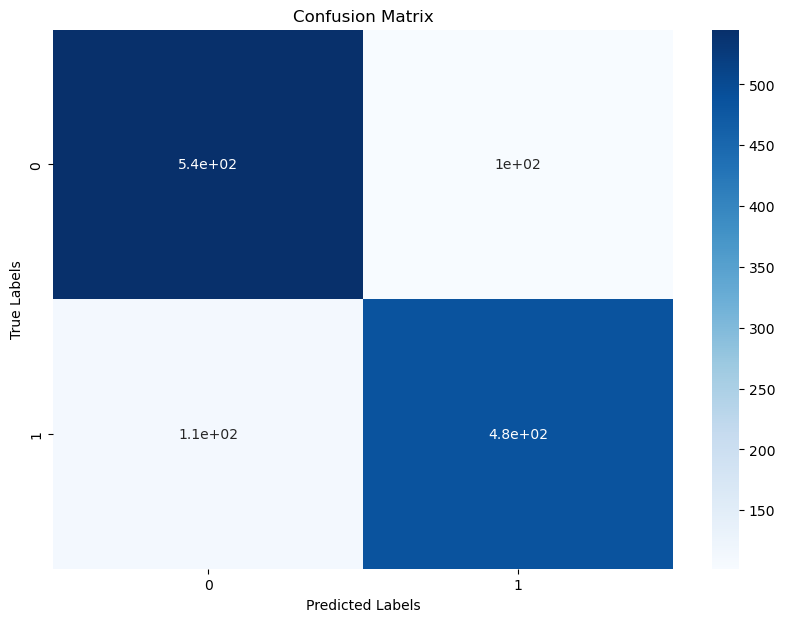

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# create heatmap using seaborn
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, cmap='Blues')


# set labels for the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

In [60]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3600,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
156/156 [==============================] - 2s 10ms/step - loss: 0.8721 - accuracy: 0.5619 - val_loss: 0.8052 - val_accuracy: 0.6050
Epoch 2/50
156/156 [==============================] - 1s 8ms/step - loss: 0.7494 - accuracy: 0.5894 - val_loss: 0.6775 - val_accuracy: 0.6082
Epoch 3/50
156/156 [==============================] - 1s 9ms/step - loss: 0.6899 - accuracy: 0.6315 - val_loss: 0.6667 - val_accuracy: 0.6219
Epoch 4/50
156/156 [==============================] - 1s 8ms/step - loss: 0.6578 - accuracy: 0.6540 - val_loss: 0.7548 - val_accuracy: 0.6010
Epoch 5/50
156/156 [==============================] - 1s 9ms/step - loss: 0.6193 - accuracy: 0.6673 - val_loss: 0.6898 - val_accuracy: 0.6380
Epoch 6/50
156/156 [==============================] - 1s 9ms/step - loss: 0.6136 - accuracy: 0.6872 - val_loss: 0.7133 - val_accuracy: 0.6291
Epoch 7/50
156/156 [==============================] - 1s 9ms/step - loss: 0.5835 - accuracy: 0.6970 - val_loss: 0.6736 - val_accuracy: 0.6436
Epoch

In [62]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

39/39 [==============================] - 0s 3ms/step - loss: 0.7332 - accuracy: 0.7812
Test accuracy: 0.7811746001243591


In [63]:
yp = model.predict(X_test)
yp[:5]

39/39 [==============================] - 0s 2ms/step


array([[0.7923847 ],
       [0.00396858],
       [0.98048115],
       [0.01476552],
       [0.02700086]], dtype=float32)

In [64]:
y_pred1 = []
for element in yp:
    if element >= 0.5:
        y_pred1.append(1)
    #if element < 0.4 and element >=-0.4:
        #y_pred.append(0)
    else:
        y_pred1.append(0)

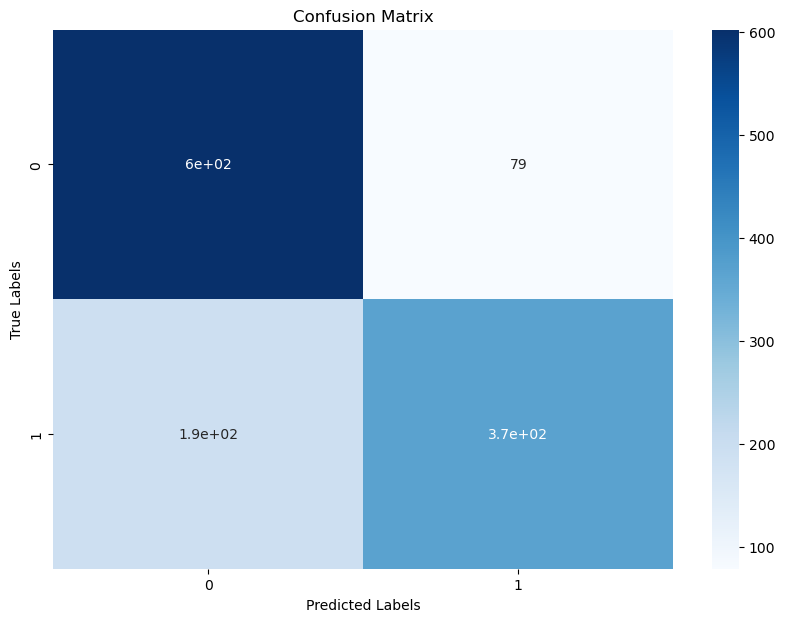

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# create heatmap using seaborn
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, cmap='Blues')


# set labels for the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()